각 시군별 동물등록대행업체 규모에 따른,   
동물등록유형(내장형/외장형/인식표)비율 을 비교한다.  
  
- 경기도 전체 평균 등물등록유형 비율
- 가장많은 동물등록대행업체가 있는 "성남시"의 동물등록유형 비율
- 가장적은 동물등록대행업체가 있는 "여주시"의 동물등록유형 비율  
을 파이차트로 나타내었다.  
  
동물대행업체가 많을수록 내장형 rfid 방법으로 동물등록을 하는 것을 알 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

Matplotlib is building the font cache; this may take a moment.


In [3]:
df_kosis= pd.read_csv('C:/Users/KimAY/Desktop/study/workspace_python/pdsample/반려동물등록대행업체현황.csv', encoding='cp949') 
df_kosis.head()

,시군명,업체명,도로명주소,지번주소,우편번호,전화번호,WGS84위도,WGS84경도
0,가평군,가평가축병원,NaN,경기도 가평군 가평읍 대곡리 230번지 3호,12420.0,031-582-2412,37.825038,127.514124
1,가평군,가평축산농협 동물병원,NaN,경기도 가평군 가평읍 대곡리,NaN,031-582-4111,NaN,NaN
2,가평군,경기 동물병원,경기도 가평군 청평면 청평중앙로 8,경기도 가평군 청평면 청평리 438-23번지 경기동물병원,12453.0,031-584-1282,37.735850,127.415936
3,가평군,선진가축병원(산업동물출장진료전문병원),경기도 가평군 가평읍 향교로 3,경기도 가평군 가평읍 읍내리 535번지 2호,12417.0,070-8739-6388,37.829437,127.510432
4,가평군,설악동물병원,경기도 가평군 설악면 신천중앙로 117,경기도 가평군 설악면 신천리 454번지 3호,12467.0,031-584-3063,37.677960,127.490633


In [4]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군명      1209 non-null   object 
 1   업체명      1209 non-null   object 
 2   도로명주소    1115 non-null   object 
 3   지번주소     1209 non-null   object 
 4   우편번호     1178 non-null   float64
 5   전화번호     1141 non-null   object 
 6   WGS84위도  1182 non-null   float64
 7   WGS84경도  1182 non-null   float64
dtypes: float64(3), object(5)
memory usage: 75.7+ KB


In [5]:
#np.sum(pd.isnull(df_kosis))

In [6]:
df_kosis['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [19]:
df=df_kosis['시군명'].value_counts()
print(type(df))
#df

<class 'pandas.core.series.Series'>


In [8]:
#초기화
df=df.reset_index() #초기화
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,index,시군명
0,성남시,123
1,수원시,122
2,용인시,110
3,고양시,99
4,부천시,77


In [9]:
df.rename(columns={'index':'시군명','시군명':'개수'}, inplace=True)
df.head()

,시군명,개수
0,성남시,123
1,수원시,122
2,용인시,110
3,고양시,99
4,부천시,77


In [10]:
df.tail()

,시군명,개수
26,가평군,8
27,포천시,7
28,과천시,6
29,여주시,6
30,연천군,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군명     31 non-null     object
 1   개수      31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [12]:
per_df= pd.read_csv('C:/Users/KimAY/Desktop/study/workspace_python/PJT01_own/RFID비율.csv') 
per_df.head()

,시군명,per_in,per_ex,per_tag
0,가평군,54.020413,38.984317,6.995270
1,고양시,64.807564,28.208211,6.984225
2,과천시,50.991832,35.764294,13.243874
3,광명시,57.425094,31.364951,11.209955
4,광주시,52.580480,27.933912,19.485607


In [13]:
#경기도 전체 평균
per_df.mean()

per_in     54.538976
per_ex     32.055752
per_tag    13.405273
dtype: float64

In [14]:
#성남시 데이터.
per_df_SN=per_df[per_df['시군명']=='성남시']
per_df_SN

,시군명,per_in,per_ex,per_tag
11,성남시,62.950264,28.796019,8.253716


In [15]:
#여주시 데이터
per_df_YC=per_df[per_df['시군명']=='여주시']
per_df_YC

,시군명,per_in,per_ex,per_tag
19,여주시,37.198971,31.564181,31.236848


경기도 전체 평균 비율

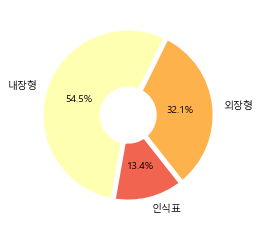

In [16]:
ratio = [54.538976, 32.055752, 13.405273]
labels = ['내장형', '외장형', '인식표']
colors = ['#FFFFB2', '#FEB24C', '#F16450']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./경기도전체평균등록유형비율파이차트.png',transparent = True)

성남시 비율

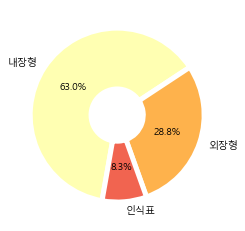

In [17]:
ratio = [62.950264, 28.796019, 8.253716]
labels = ['내장형', '외장형', '인식표']
colors = ['#FFFFB2', '#FEB24C', '#F16450']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.savefig('./성남시등록유형비율파이차트.png',transparent = True)

여주시 비율

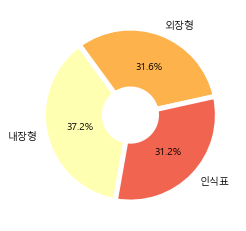

In [18]:
ratio = [37.198971, 31.564181, 31.236848]
labels = ['내장형', '외장형', '인식표']
colors = ['#FFFFB2', '#FEB24C', '#F16450']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./여주시등록유형비율파이차트.png',transparent = True)